In [2]:
import pandas as pd
import os
import pathlib

In [3]:
cwd = os.getcwd()
filepath = list(pathlib.Path(cwd).rglob('benchmark_dataset.csv.gz'))

In [4]:
df = pd.read_csv(filepath[0],compression='gzip')

In [5]:
#convert to timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
#check which columns have missing values or are completely empty in this case
var_counts = pd.DataFrame(df.isna().sum())
var_counts[var_counts[0]>0]

,0
Binlog_snapshot_file,8484
Innodb_buffer_pool_dump_status,8484
Innodb_buffer_pool_resize_status,8484
Ssl_cipher,8484
Ssl_cipher_list,8484
Ssl_server_not_after,8484
Ssl_server_not_before,8484
Ssl_version,8484
wsrep_cluster_state_uuid,8484
wsrep_provider_name,8484


In [8]:
#set timestamp for plotting
df = df.set_index('timestamp')

In [56]:
#examine which columns have high cardinality
unique_counts = pd.DataFrame(df.nunique())
unique_counts[unique_counts[0]>10].head()

,0
Bytes_received,8063
Bytes_sent,8065
Com_commit,6343
Com_delete,5245
Com_insert,7669


In [28]:
#drop columns with constant value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

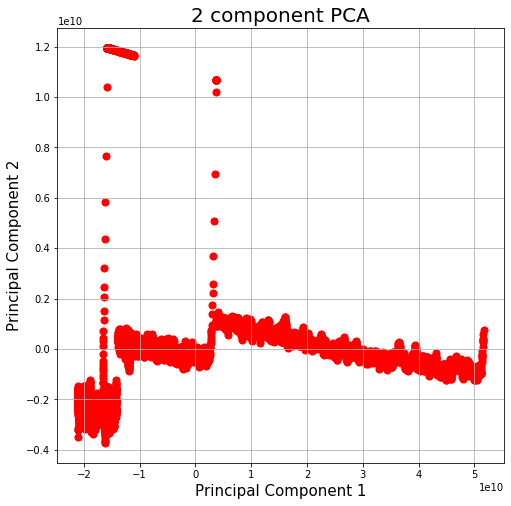

In [44]:
#run PCA
from sklearn import decomposition as d
import matplotlib.pyplot as plt

x = df.values
pca = d.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']
ax.scatter(principalDf.iloc[:,0]
           , principalDf.iloc[:,1]
           , c = colors[0]
           , s = 50)
ax.grid()

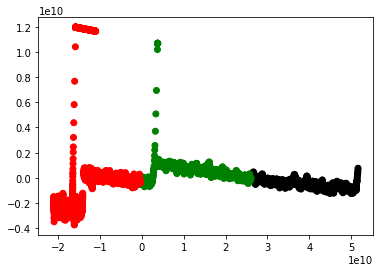

In [54]:
#k-means to make sense of the data generated by PCA
from sklearn.cluster import KMeans
db = KMeans(n_clusters=3).fit_predict(principalDf.values)
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'g',
                   }

label_color = [LABEL_COLOR_MAP[l] for l in db]
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=label_color)
plt.show()